# Artificial Neural Networks (ANN)

###  1 - Dataset: edge_iiot.csv. Link: https://www.techrxiv.org/articles/preprint/Edge-IIoTset_A_New_Comprehensive_Realistic_Cyber_Security_Dataset_of_IoT_and_IIoT_Applications_for_Centralized_and_Federated_Learning/18857336.

### a) Split the data in train, test and validation. Train and evaluate the model MLP (multilayer perceptron): 1 hidden layer and training in minibatch via SGD with term of momentum. Use the validation set to adjust the hyperparameters.

### b) Present the cost function curves on the training and validation sets over epochs. Also report the accuracy obtained for the training, validation and test sets.

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
database = np.genfromtxt("../data/edge_iiot.csv", delimiter = ',')
database.shape

(137382, 69)

In [4]:
x = database[:,:-1]
y = database[:,-1]

In [5]:
x.shape, y.shape

((137382, 68), (137382,))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, shuffle = True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2
X_train_val = np.concatenate((X_train, X_val), axis=0)
y_train_val = np.concatenate((y_train, y_val), axis=0)

In [7]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape, X_train_val.shape, y_train_val.shape

((82428, 68),
 (82428,),
 (27477, 68),
 (27477,),
 (27477, 68),
 (27477,),
 (109905, 68),
 (109905,))

In [8]:
# Standardization
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)
X_train_val_scaled = scaler.transform(X_train_val)

In [9]:
clf = MLPClassifier(hidden_layer_sizes=100, solver = 'sgd', batch_size=32, shuffle = True, alpha = 0, max_iter =200,
                    learning_rate = 'adaptive', momentum=0.9, nesterovs_momentum=True).fit(X_train_scaled, y_train)

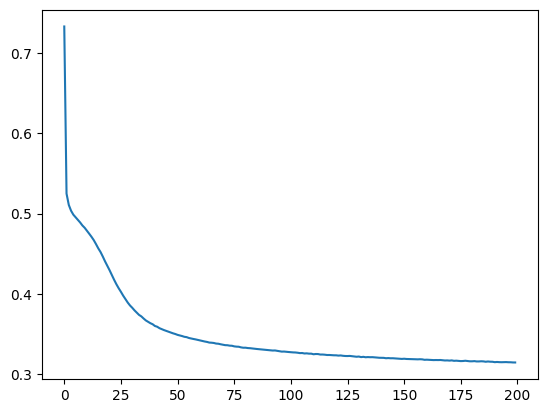

In [10]:
plt.plot(clf.loss_curve_)

In [11]:
clf.score(X_val_scaled, y_val)

0.833060377770499

In [12]:
# Training accuracy
pred = clf.predict(X_val_scaled)
accuracy_score(y_val, pred)

0.833060377770499

In [13]:
clf.get_params()

{'activation': 'relu',
 'alpha': 0,
 'batch_size': 32,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': 100,
 'learning_rate': 'adaptive',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'sgd',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [14]:
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3995
         1.0       0.98      0.97      0.97      1873
         2.0       0.99      0.46      0.63      1483
         3.0       1.00      1.00      1.00      2485
         4.0       0.67      1.00      0.80      2068
         5.0       1.00      1.00      1.00      2950
         6.0       0.00      0.00      0.00        26
         7.0       1.00      1.00      1.00        73
         8.0       0.80      0.21      0.34      1806
         9.0       1.00      0.51      0.67      1800
        10.0       0.99      0.94      0.97      1777
        11.0       0.45      0.98      0.62      1948
        12.0       0.98      0.40      0.57      1582
        13.0       0.99      0.86      0.92      1954
        14.0       0.61      1.00      0.76      1657

    accuracy                           0.83     27477
   macro avg       0.83      0.75      0.75     27477
weighted avg       0.89   

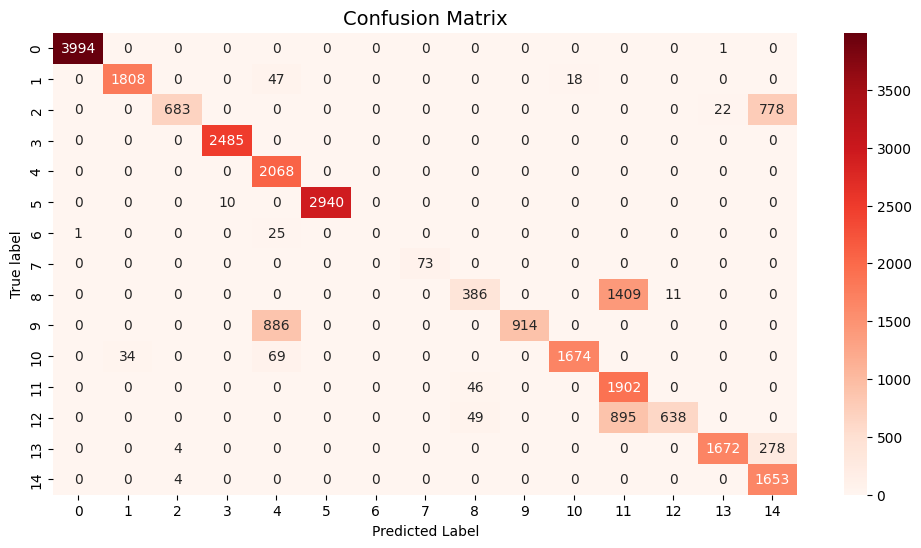

In [15]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_val, pred), annot=True, ax=ax, fmt='d', cmap='Reds')
ax.set_title("Confusion Matrix", fontsize=14)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
ax.figure.set_size_inches(12, 6)

**Retrain the training and validation set to verify its generalization with the test set**

In [16]:
clf_train_val = MLPClassifier(hidden_layer_sizes=100, solver = 'sgd', batch_size=32, shuffle = True, alpha = 0, max_iter =200,
                    learning_rate = 'adaptive', momentum=0.9, nesterovs_momentum=True).fit(X_train_val_scaled, y_train_val)

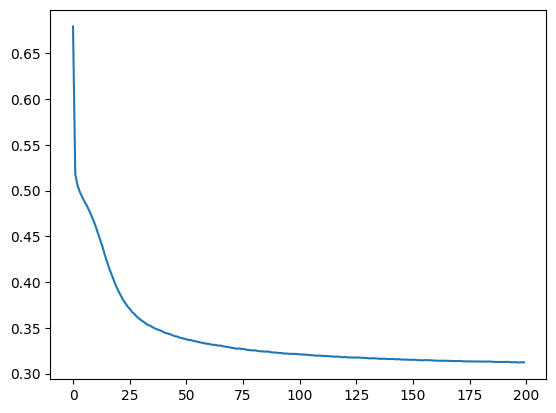

In [17]:
#loss_curve_list of shape (n_iter_,): Loss value evaluated at the end of each training step. The ith element in the list represents the loss at the ith iteration.
plt.plot(clf_train_val.loss_curve_)

In [18]:
clf_train_val.score(X_test_scaled, y_test)

0.824507770135022

In [19]:
# Test accuracy: 
pred = clf_train_val.predict(X_test_scaled)
accuracy_score(y_test, pred)

0.824507770135022

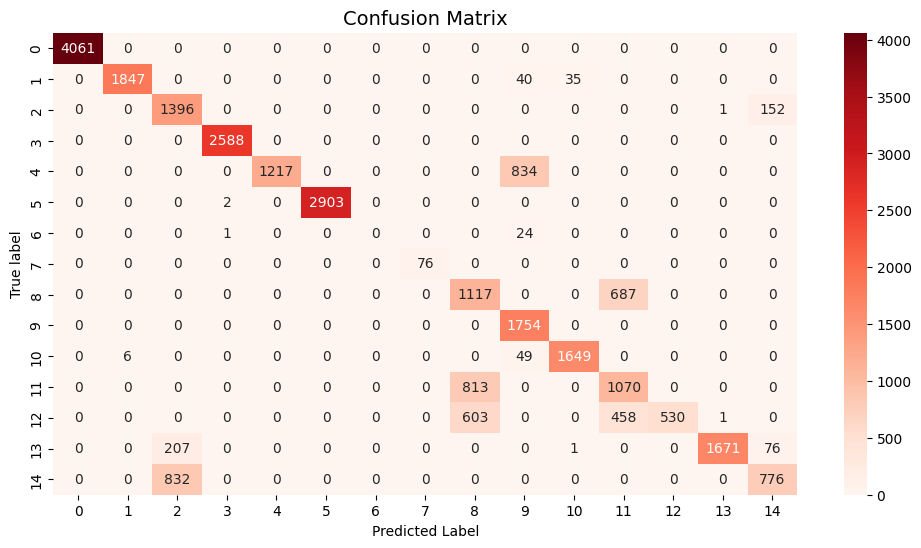

In [20]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, pred), annot=True, ax=ax, fmt='d', cmap='Reds')
ax.set_title("Confusion Matrix", fontsize=14)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
ax.figure.set_size_inches(12, 6)

In [21]:
pred_train = clf_train_val.predict(X_train_scaled)
pred_val = clf_train_val.predict(X_val_scaled)
pred_test = clf_train_val.predict(X_test_scaled)

In [22]:
print(accuracy_score(y_train, pred_train))
print(accuracy_score(y_val, pred_val))
print(accuracy_score(y_test, pred_test))

0.830227592565633
0.8256723805364486
0.824507770135022


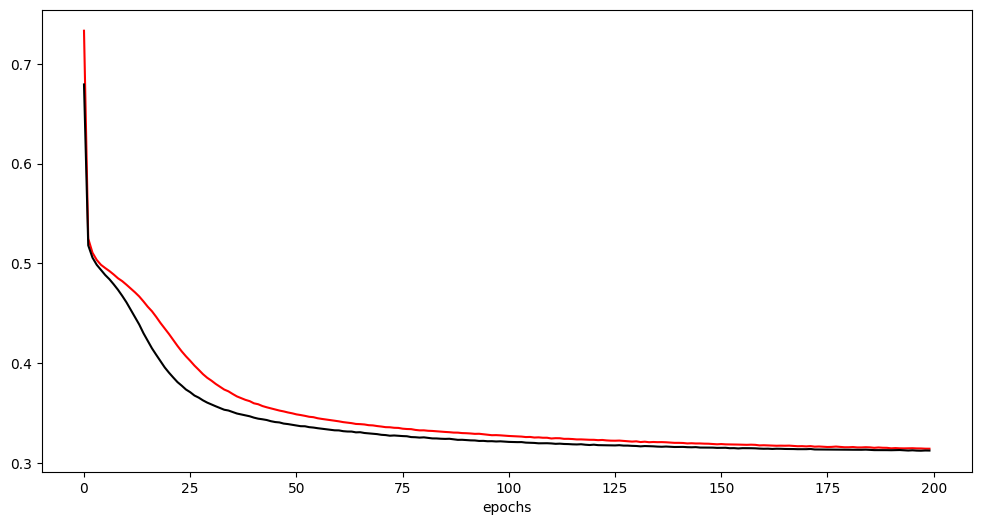

In [23]:
train = clf.loss_curve_
test = clf_train_val.loss_curve_
fig,ax1 = plt.subplots(figsize=(12,6))
ax1.plot(train, color = 'red')
ax1.plot(test, color = 'black')
ax1.set(xlabel = "epochs");
plt.show()